# <center>Uk visits Abroad</center>
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
# Load the data
df = pd.read_excel('data/uk_data.xls', names =['period', 'visits'], skiprows=7)

# Create a column specifying the granularity of the "period" field
df['granularity'] = df['period'].apply(lambda x: 'year' if len(x) == 4 else 'quarter' if len(x) == 7 else 'month')

# Show
df.head()

,period,visits,granularity
0,1986,24947,year
1,1987,27447,year
2,1988,28830,year
3,1989,31033,year
4,1990,31150,year


In [3]:
pd.to_datetime('1991-01-01', format='%Y-%m-%d').date()

datetime.date(1991, 1, 1)

### Set up views for each plot
---

In [4]:
# Total volume by month
month_df = df.loc[df['granularity'] == 'month', ['period', 'visits']]

# Convert the period column to date and set it as the index
month_df = month_df\
    .set_index(month_df['period'].apply(lambda x: pd.to_datetime(x, format='%Y %b')))\
    .drop('period', axis=1)


# Quarter over quarter percent
quarter_df = df\
    .loc[df['granularity'] == 'quarter', ['period', 'visits']]\
    .reset_index(drop=True)

# Add Quarter over quarter percent change column 
quarter_df['pct_change'] = (quarter_df['visits'].pct_change() * 100).apply(lambda x: round(x, 1))

### Create plot
---

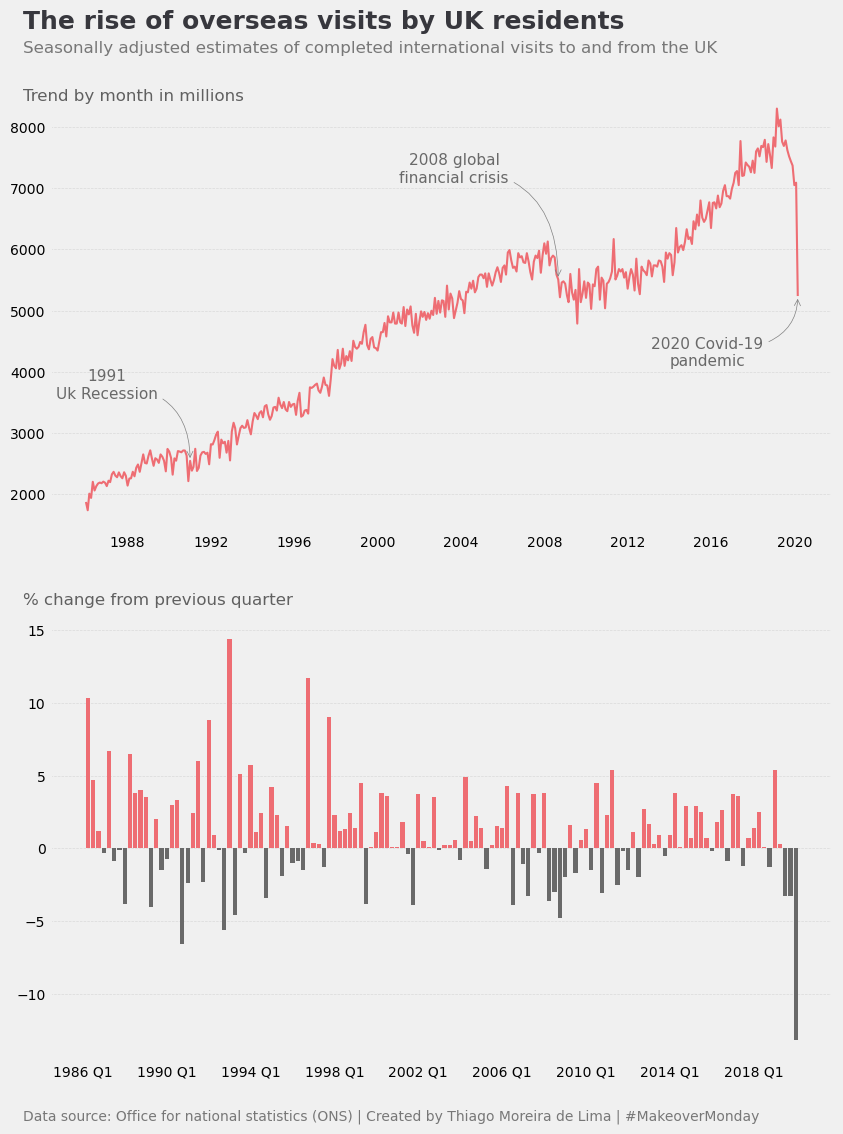

In [5]:
# Basic formatting defaults
plt.style.use('fivethirtyeight')

# Define layout
fig, ax = plt.subplots(2, 1, figsize=(9,12), dpi=100) 


# Plot visits by month
line_ax = ax[0]
line_ax.plot(month_df.index, month_df['visits'], linewidth=1.5, color='#ee6d73')
line_ax.yaxis.grid(True, linewidth=0.5, linestyle='--', alpha=0.6)
line_ax.xaxis.grid(False)
line_ax.tick_params(labelsize=10)

# Annotations
uk_recession = line_ax.annotate(s="1991\nUk Recession",
            xy=(pd.to_datetime('1991-01-01'), month_df.loc['1991-01-01'].max()), xycoords='data',
            ha='center', size=11, color='#696969',
            xytext=(-60, 45), textcoords='offset points',
            arrowprops={'arrowstyle' : "->", 'color' : '#808080', 'connectionstyle' : "angle3,angleA=0,angleB=-90"})

financial_crisis = line_ax.annotate(s="2008 global\nfinancial crisis",
            xy=(pd.to_datetime('2008-09-01'), month_df.loc['2008-09-01'].max()), xycoords='data',
            ha='center', size=11, color='#696969',
            xytext=(-75, 70), textcoords='offset points',
            arrowprops={'arrowstyle' : "->", 'color' : '#808080', 'connectionstyle' : "angle3,angleA=0,angleB=-90"})

covid_impact = line_ax.annotate(s="2020 Covid-19\npandemic",
            xy=(pd.to_datetime('2020-03-01'), month_df.loc['2020-03-01'].max()), xycoords='data',
            ha='center', size=11, color='#696969',
            xytext=(-65, -50), textcoords='offset points',
            arrowprops={'arrowstyle' : "->", 'color' : '#808080', 'connectionstyle' : "angle3,angleA=0,angleB=-90"})

# Plot % change by quarter
quarter_ax = ax[1]
for idx, val in zip(quarter_df.index, quarter_df['pct_change']):
    color ='#ee6d73' if val >= 0 else '#696969'
    quarter_ax.bar(idx, val, color=color)
quarter_ax.yaxis.grid(True, linewidth=0.5, linestyle='--', alpha=0.6)
quarter_ax.xaxis.grid(False)
quarter_ax.tick_params(labelsize=10)
xpos, xlabels = quarter_df.index.tolist()[::16], quarter_df['period'].tolist()[::16]
plt.xticks(ticks=xpos, labels=xlabels)

# Overall title and subtitle
fig.text(x =0.05, y= 0.93, s = 'The rise of overseas visits by UK residents', color='#37373d', size=18, weight='semibold' )
fig.text(x =0.05, y= 0.91, s = 'Seasonally adjusted estimates of ' + 
         'completed international visits to and from the UK', size=12, alpha=0.5)

# Subplot titles
fig.text(x =0.05, y= 0.87, s = 'Trend by month in millions', size=12, alpha=0.6 )
fig.text(x =0.05, y= 0.45, s = '% change from previous quarter', size=12, alpha=0.6 )


# Footnote
footnote = fig.text(s='Data source: Office for national statistics (ONS) | ' + 
                    'Created by Thiago Moreira de Lima | #MakeoverMonday', 
                    ha='left', x=0.05, y=0.02, size=10, alpha=0.5)

# Save as png
fig.savefig('uk_visits_abroad_plot.png', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')